### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = df.iloc[:,3:5].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Elbow method

Text(0, 0.5, 'WCSS')

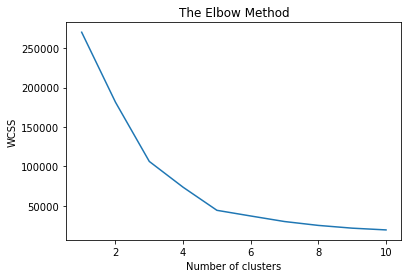

In [6]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [7]:
# K = 5

### Training the Model

In [8]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=42)

In [9]:
y_kmeans = kmeans.fit_predict(X)

In [10]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

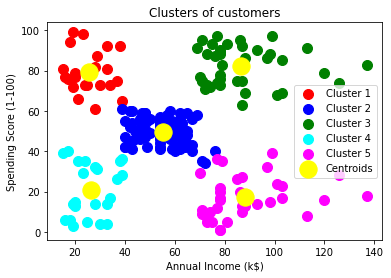

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [12]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df = df.drop("CustomerID",axis=1)

In [14]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
df = pd.get_dummies(data=df,drop_first=True)

In [16]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [17]:
df = df[["Age","Annual Income (k$)","Genre_Male","Spending Score (1-100)"]]

In [18]:
df.head()

,Age,Annual Income (k$),Genre_Male,Spending Score (1-100)
0,19,15,1,39
1,21,15,1,81
2,20,16,0,6
3,23,16,0,77
4,31,17,0,40


In [19]:
X = df.values

In [20]:
X

array([[ 19,  15,   1,  39],
       [ 21,  15,   1,  81],
       [ 20,  16,   0,   6],
       [ 23,  16,   0,  77],
       [ 31,  17,   0,  40],
       [ 22,  17,   0,  76],
       [ 35,  18,   0,   6],
       [ 23,  18,   0,  94],
       [ 64,  19,   1,   3],
       [ 30,  19,   0,  72],
       [ 67,  19,   1,  14],
       [ 35,  19,   0,  99],
       [ 58,  20,   0,  15],
       [ 24,  20,   0,  77],
       [ 37,  20,   1,  13],
       [ 22,  20,   1,  79],
       [ 35,  21,   0,  35],
       [ 20,  21,   1,  66],
       [ 52,  23,   1,  29],
       [ 35,  23,   0,  98],
       [ 35,  24,   1,  35],
       [ 25,  24,   1,  73],
       [ 46,  25,   0,   5],
       [ 31,  25,   1,  73],
       [ 54,  28,   0,  14],
       [ 29,  28,   1,  82],
       [ 45,  28,   0,  32],
       [ 35,  28,   1,  61],
       [ 40,  29,   0,  31],
       [ 23,  29,   0,  87],
       [ 60,  30,   1,   4],
       [ 21,  30,   0,  73],
       [ 53,  33,   1,   4],
       [ 18,  33,   1,  92],
       [ 49,  

In [21]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

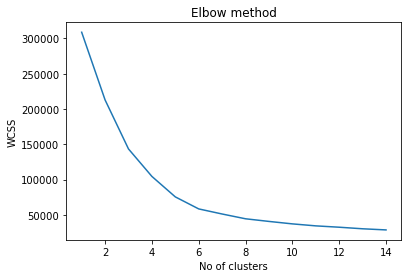

In [22]:
WCSS = []

for i in range(1,15):
    
    Kmeans = KMeans(n_clusters=i,init="k-means++",random_state=42)
    
    Kmeans.fit(X)
    
    WCSS.append(Kmeans.inertia_)
    
plt.plot(range(1,15),WCSS)
plt.title("Elbow method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")

## Training

In [24]:
Kmeans = KMeans(n_clusters=7,init="k-means++",random_state=42)

In [25]:
y_pred_km = Kmeans.fit_predict(X)

In [26]:
print(y_pred_km)

[4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4
 5 4 5 0 5 4 2 4 5 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 3 2 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 6 1 6 1
 6 1 6 1 6 1 6 1 6 1 6 1 6 1 6]


In [ ]:
n